# SAXS&WAXS pipeline for calibrations of beamline parameters, including beam center, det-sam distance etc.


## Overview

* Setup: load packages/setup path
* Load Mask (made at the beamline)
* Check beam center
* Do circulare average to check the det-sam distance
* Export calibration results (mask data, beamline parameters) to a hdf file 
 

### DEV
* V0: Initialize the pipeline (2019/10/26 by YG yuzhang@bnl.gov)
* V1: Develop the pyScatt package (2019/11/6 by YG yuzhang@bnl.gov 
* V2: Develop make mask and check beam center using a qphi-analysis 
<br> $\;\;\;\;$   Develop the create mask option to make circle, rotated_line shapes 
<br> $\;\;\;\;$   Develop the qphi analysis to check the beam center
* V3: Develop automatically search beam center
* V4: Add more controls/functions for the creation of mask
      

## TODLIST
* 1): Put codes into a package (Done)



In [11]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })

plt.rcParams.update({ 'image.interpolation': 'none'   })
 

# Setup paths

In [12]:
####
username = 'yuzhang'


inDir = '/home/%s/Test_SAXS/Data/'%username
outDir = '/home/%s/Test_SAXS/Results/'%username




# Load/Create Mask

In [26]:
load_mask = True
recreate_mask = True

In [27]:
if load_mask:
    fp0='Pilatus2M_gaps-mask.png'
    fp = 'Pilatus2M_current-mask.png'

    mask = np.array( get_cms_img( fp0, inDir )[:,:,1], dtype=bool)
    mask *= np.array( get_cms_img( fp, inDir )[:,:,1], dtype=bool)
else:
    mask = 1

<IPython.core.display.Javascript object>


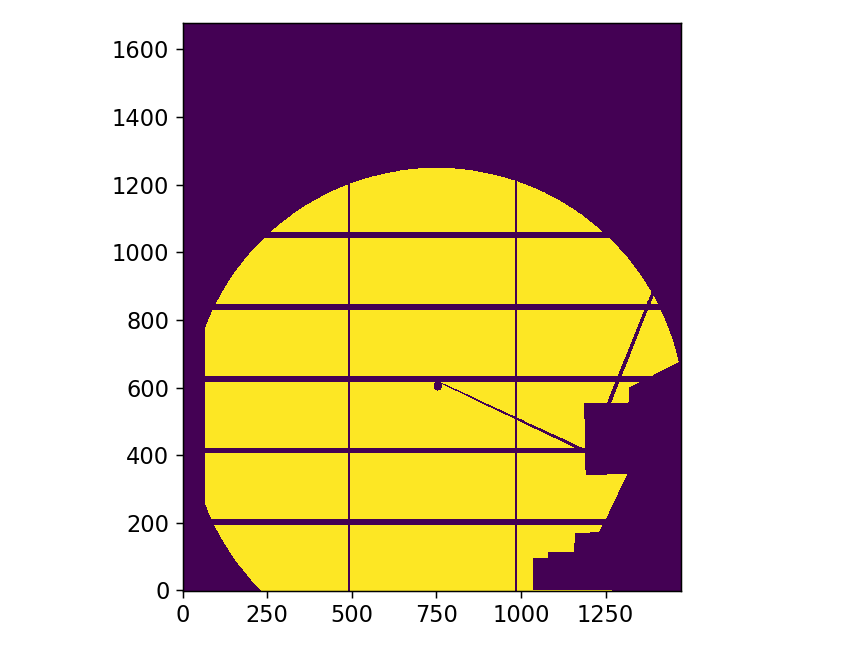

In [28]:
if load_mask:
    show_img(mask, show_colorbar=False, aspect=1)

# Check data in inDir

In [29]:
tifs = np.array( ls_dir(inDir) )
print(len(tifs))
tifs

15


array(['AgBH_cali_13.5kev_x-17.000_y-2.170_5.00s_2608571_waxs.tiff',
       'Pilatus2M_current-mask.png',
       'f3b03825-edfa-43f3-b333_000003.tiff',
       'f3b03825-edfa-43f3-b333_000002.tiff',
       'AgBH_cali_13.5kev_x-17.000_y-2.170_1.00s_2608570_saxs.tiff',
       'AgBH_cali_13.5kev_x-17.000_y-2.170_5.00s_2608571_saxs.tiff',
       'FL_1024Morn_F1_x0.100_y0.150_0.10s_2605949_saxs.tiff',
       'Pilatus2M_gaps-mask.png',
       'FL_1026Morn_F2_x0.000_y0.000_1.00s_2607309_saxs.tiff',
       'Pilatus800_current-mask.png',
       'FL_1024Morn_F1_x0.100_y0.150_0.10s_2605950_saxs.tiff',
       'AgBH_cali_13.5kev_x-17.000_y-2.170_1.00s_2608570_waxs.tiff',
       'Pilatus800_custom-mask.png',
       'f3b03825-edfa-43f3-b333_000001.tiff',
       'FL_1024Ngt_10nmSP_Form_Factor_x-0.900_y-0.400_5.00s_2606361_saxs.tiff'],
      dtype='<U69')

## check one image

In [30]:
fp = 'AgBH_cali_13.5kev_x-17.000_y-2.170_5.00s_2608571_saxs.tiff'



In [31]:
img_ = get_cms_img( fp, inDir ) 
img = img_ * mask
img.shape

(1679, 1475)

<IPython.core.display.Javascript object>


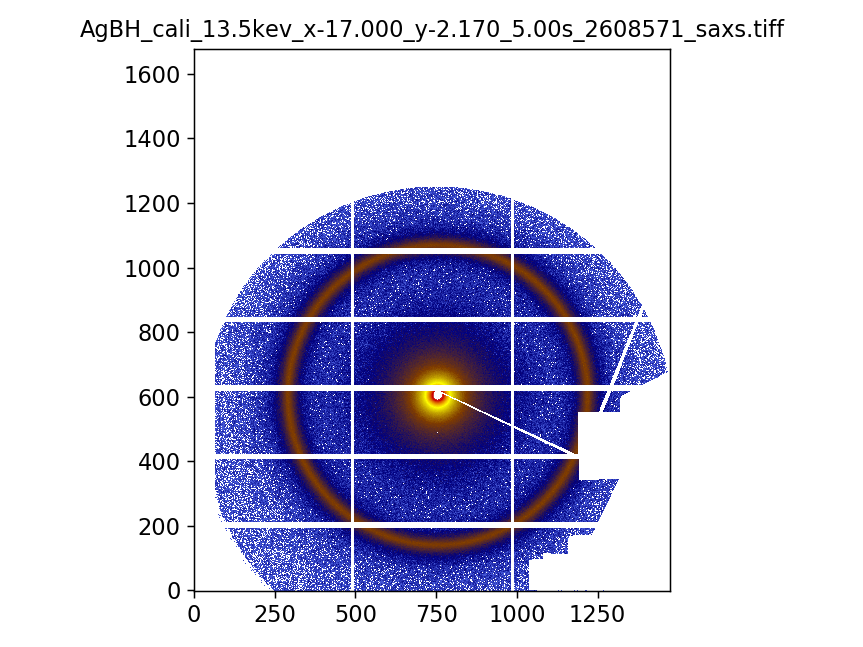

In [32]:
show_img( img, logs=True, aspect= 1, cmap=  cmap_hdr_goldish, #cmap_albula, #
         vmin=1e-3, vmax=1e6,
         image_name= fp, save=True,path=outDir)

<IPython.core.display.Javascript object>


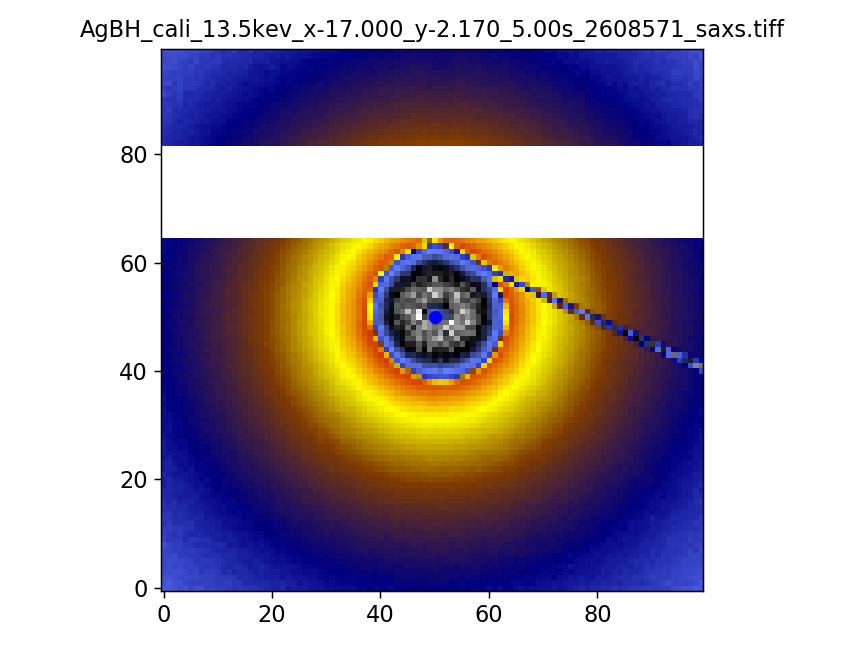

In [21]:
cw0= 50
center = [ 604,753  ]
cx0,cy0= center
show_img( img[cx0-cw0:cx0+cw0,cy0-cw0:cy0+cw0], logs=True, aspect= 1, cmap=  cmap_hdr_goldish,
         image_name= fp[:], vmax=1e6, save=True,path=outDir, center=[cw0,cw0] )

## Re-create mask

* Create the gap mask
   * Load from the detector file
   * Or create the chip mask

In [33]:
load_gap_mask = True #False

<IPython.core.display.Javascript object>


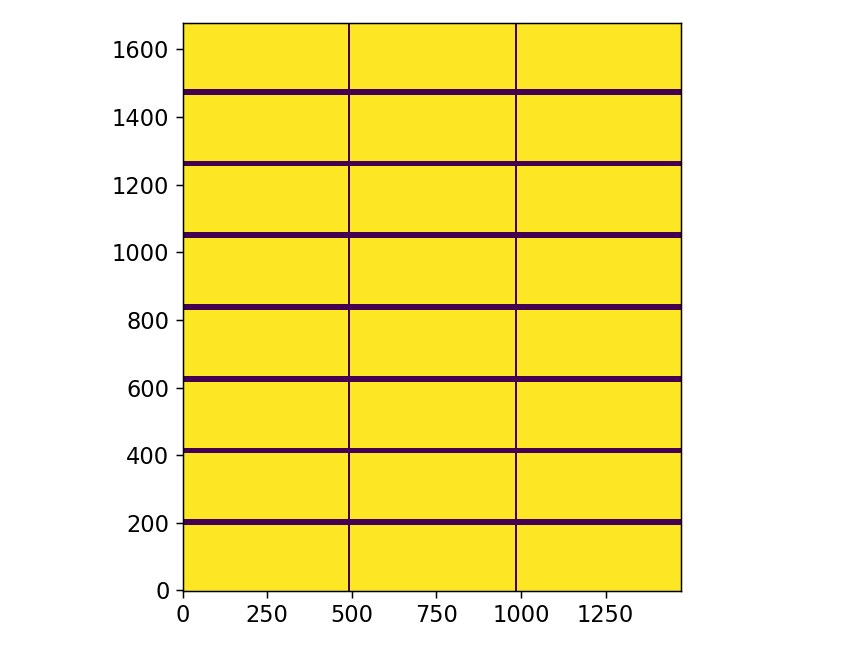

In [34]:
if recreate_mask:
    ##load gap mask if have
    if load_gap_mask:
        maskr = np.array( get_cms_img( fp0, inDir )[:,:,1], dtype=bool)
    ##create the chip mask
    else:
        mask_chip = create_cross_mask(  img, center= [0, 203],
                                wy_left= 0, wy_right= 10, 
                                  wx_up= 0, wx_down= 0,center_radius= 0 )

        mask_chip *= create_cross_mask(  img, center= [0, 415],
                                    wy_left= 0, wy_right= 10, 
                                      wx_up= 0, wx_down= 0,center_radius= 0 )
        mask_chip *= create_cross_mask(  img, center= [0, 627],
                                    wy_left= 0, wy_right= 10, 
                                      wx_up= 0, wx_down= 0,center_radius= 0 )

        mask_chip *= create_cross_mask(  img, center= [0, 839],
                                    wy_left= 0, wy_right= 10, 
                                      wx_up= 0, wx_down= 0,center_radius= 0 )
        mask_chip *= create_cross_mask(  img, center= [491, 0],
                                    wy_left= 0, wy_right= 0, 
                                      wx_up= 10, wx_down= 0,center_radius= 0 )
        maskr = mask_chip
    show_img(maskr, show_colorbar=False, aspect=1)

* Create a window mask

<IPython.core.display.Javascript object>


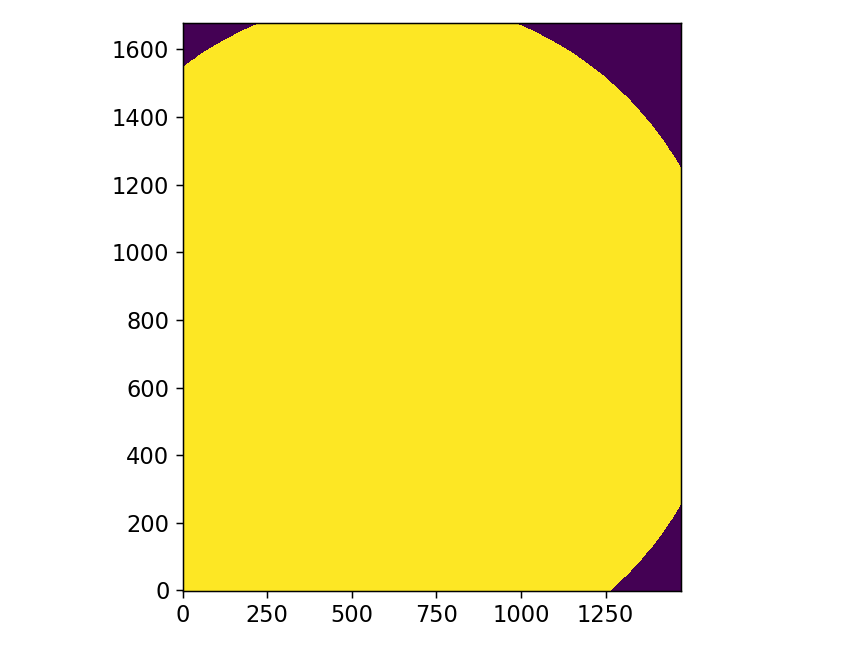

In [36]:
if recreate_mask:   
    win_mask = ~ create_cross_mask(  img, center=center,
                            wy_left= 0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius= 1000 )
    show_img( win_mask, aspect=1)

* Create a circle shaped mask around the center
    * center_radius: define the radius of the circle

<IPython.core.display.Javascript object>


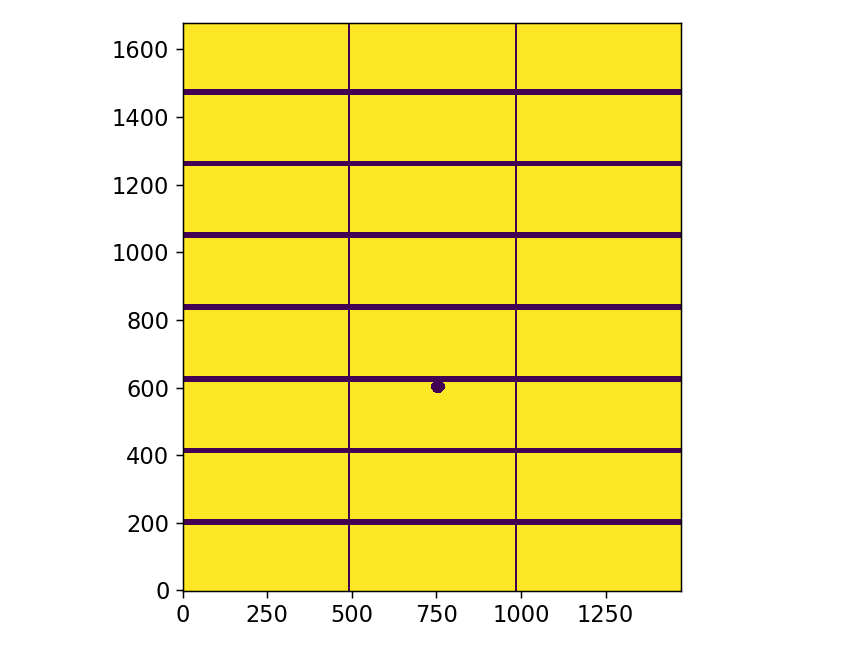

In [37]:
if recreate_mask:    
    cen_mask = create_cross_mask(   maskr, center=[  cy0,cx0 ],  
                                wy_left= 0, wy_right= 0, 
                                wx_up= 0, wx_down= 0, center_radius= 20 )
    show_img( maskr * cen_mask , show_colorbar=False, aspect=1)    

* Create a rotated line to mask out the beam stop
    * center: define the start ponit of the line
    * length: define the length of the line
    * width: define the width of the line
    * angle: define the rotation angle of the line        

<IPython.core.display.Javascript object>


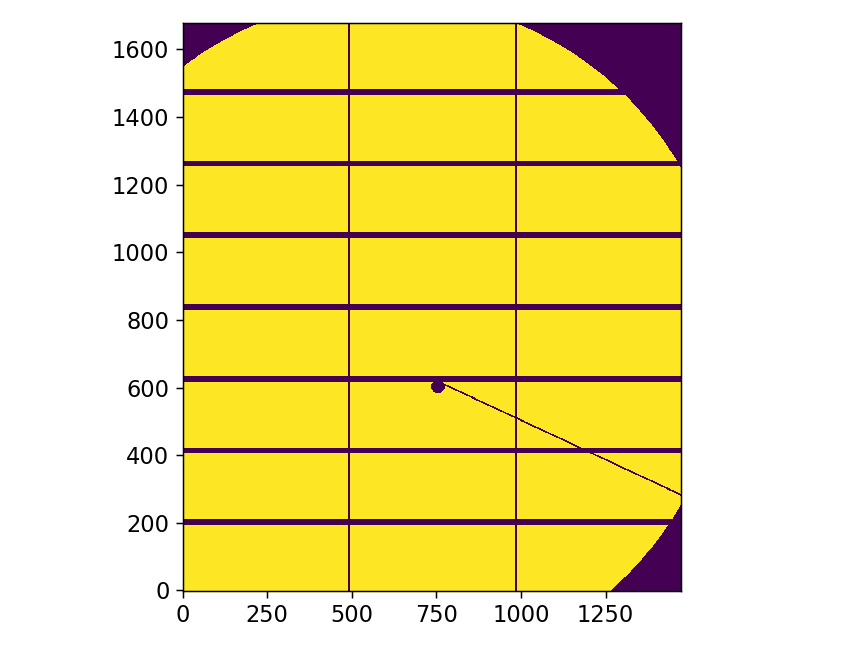

In [38]:
if recreate_mask:  
    rot_mask = create_multi_rotated_rectangle_mask(maskr, 
                                                   center = [  758, 616 ], 
                                                   length=1000,
                                                   width= 5, 
                                                   angles=[  115 ] ) 

    show_img( maskr * cen_mask * rot_mask * win_mask, show_colorbar=False, aspect=1)  
 

* Combine with the beamline mask together

<IPython.core.display.Javascript object>


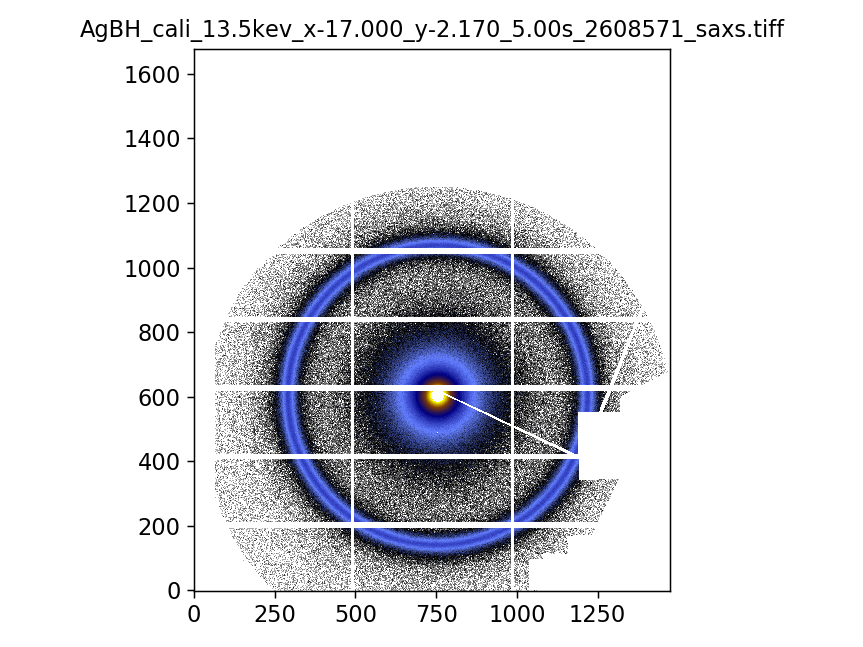

In [39]:
if recreate_mask:  
    mask = mask * maskr * cen_mask * rot_mask * win_mask
    show_img( mask * img_, logs=True, aspect= 1, cmap=  cmap_hdr_goldish,
         image_name= fp[:], vmax=1e6, save=True,path=outDir  ) 

<IPython.core.display.Javascript object>


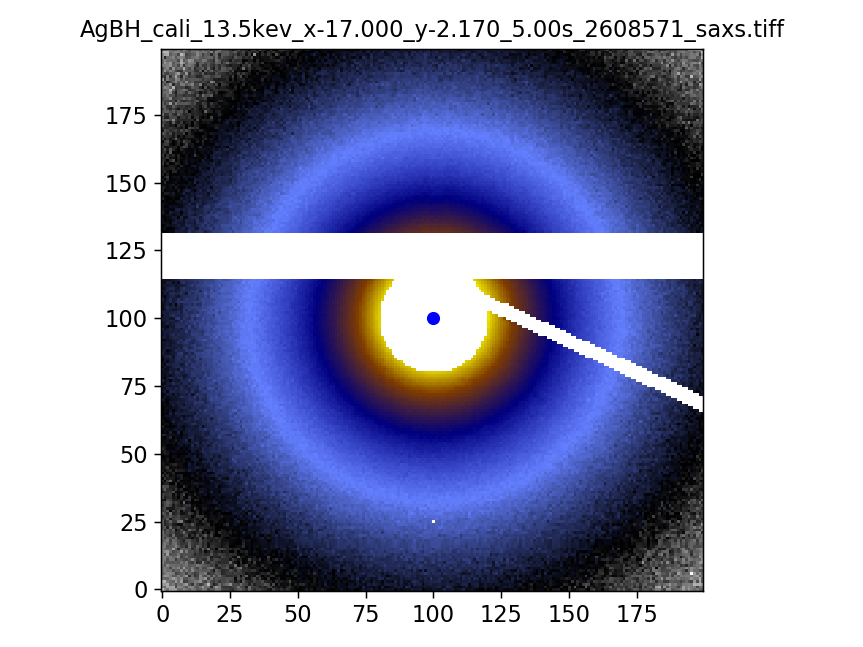

In [40]:
if recreate_mask:  
    cw0= 100
    #cx0,cy0= (604, 753 ) #(606, 753 )
    show_img( (mask*img)[cx0-cw0:cx0+cw0,cy0-cw0:cy0+cw0], logs=True, aspect= 1, cmap=  cmap_hdr_goldish,
         image_name= fp[:], vmax=1e6, save=True,path=outDir, center=[cw0,cw0] )

## Beamline parameters for SAXS

In [41]:
center

[604, 753]

In [42]:
#center = [ mask.shape[0] - 1073 ,753   ]  #[     607, 784    ]  #  [cx,  mask.shape[0] - 1072 , cx ]
center = [ 605, 753 ]  
#center = [ 603, 753 ]  
print(center)

inc_x0 =  center[1]
inc_y0=   center[0]
cx,cy=center
cw=300
#Ldet = 5.08 *1000  #5.038 *1000 
Ldet =   5.065 *1000 
lambda_ = 0.9184
dpix = 172 *10**(-3)
exposuretime = 0.1
timeperframe = 0.1
uid = 'sid=xx'
setup_pargs=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, exposuretime=exposuretime,
        timeperframe=timeperframe, center=center, path= outDir )
print_dict( setup_pargs )

[605, 753]
uid--> sid=xx
dpix--> 0.17200000000000001
Ldet--> 5065.0
lambda_--> 0.9184
exposuretime--> 0.1
timeperframe--> 0.1
center--> [605, 753]
path--> /home/yuzhang/Test_SAXS/Results/


# Primary check beam center

In [43]:
ring = create_ring_mask( mask.shape, r1=463-2, r2=463+2, center=center[::-1])

<IPython.core.display.Javascript object>


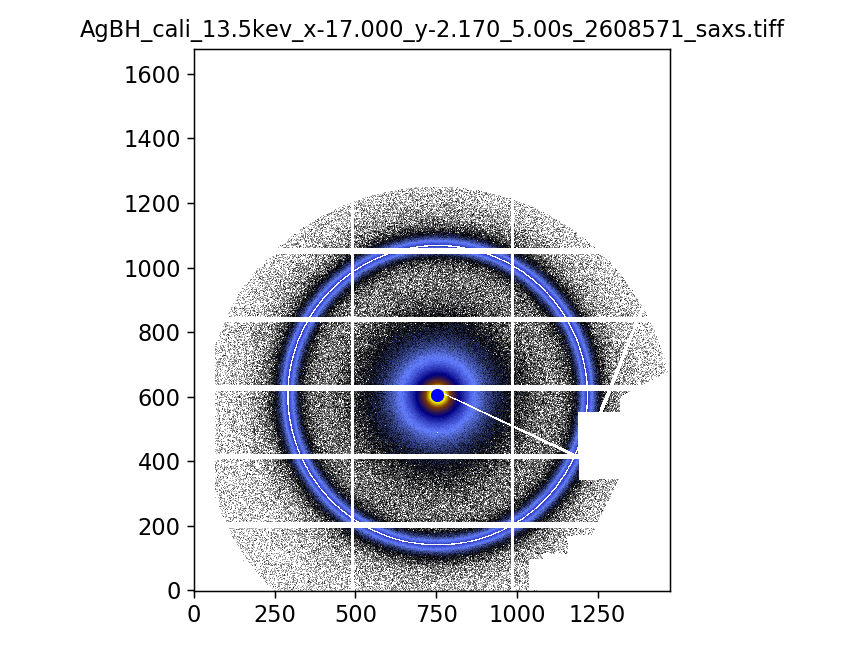

In [44]:
show_img( img * (1+ ring*1e8), vmax=1e6,logs=True, aspect= 1, cmap=  cmap_hdr_goldish, 
         image_name= fp[:], save=True,path=outDir, center=center[::-1])

In [45]:
cw2=500

<IPython.core.display.Javascript object>


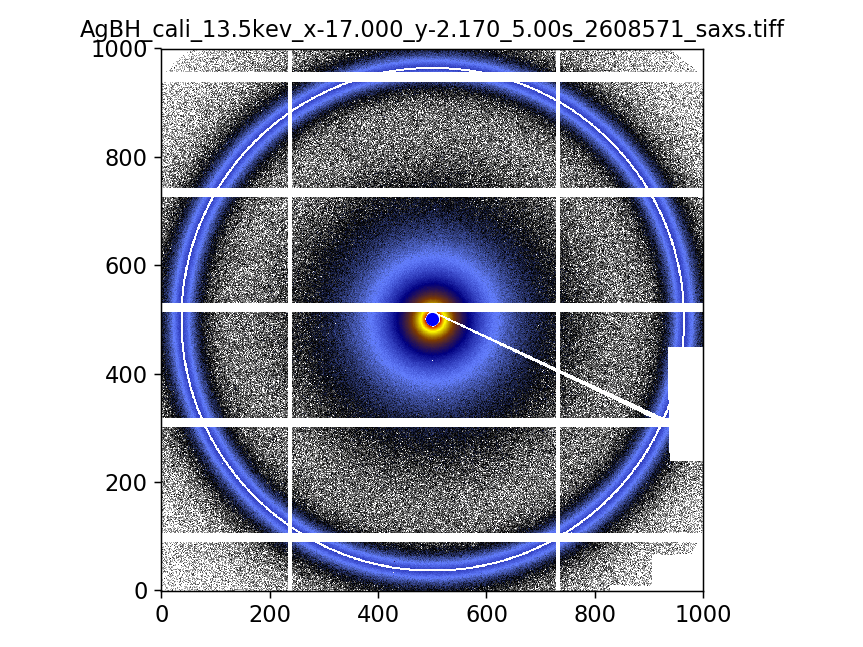

In [46]:
d = img * (1+ ring*1e8)
show_img( d[cx-cw2:cx+cw2,cy-cw2:cy+cw2], logs=True, aspect= 1, cmap=  cmap_hdr_goldish,
         image_name= fp[:], vmax=1e6, save=True,path=outDir, center=[cw2,cw2] )

## A qphi analysis to check beam center

In [47]:
bin_num_q =  1000 
bin_num_phi =  180


In [48]:
bins = bin_num_q, bin_num_phi

q_map_ = utils.radial_grid( center, img.shape, pixel_size= [dpix,dpix] )
q_map =  utils.twotheta_to_q( utils.radius_to_twotheta(Ldet, q_map_),lambda_ )
phi_map = np.degrees( angle_grid(center, img.shape,) )

qang_range=  None
q_map_ = utils.radial_grid( center, img.shape, pixel_size= [1,1] )
phi_map = np.degrees( angle_grid(center, img.shape,) )

sqphi,  qs,  phis = qphiavg(img, q_map=q_map, phi_map=phi_map, mask=mask, bins= bins,
        origin= center, range=qang_range, statistic='mean') 

sqphim,  qsm,  phism = qphiavg(mask, q_map=q_map, phi_map=phi_map, mask=mask, bins= bins,
        origin= center, range=qang_range, statistic='mean') #statistic='mean')
ma = np.ma.masked_invalid(sqphim).mask # account for the invide values, i.e., np.nan

/home/yuzhang/conda_envs/pyScattering/lib/python3.7/site-packages/skbeam/core/accumulators/binned_statistic.py:349: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.result = self.result[core]


<IPython.core.display.Javascript object>


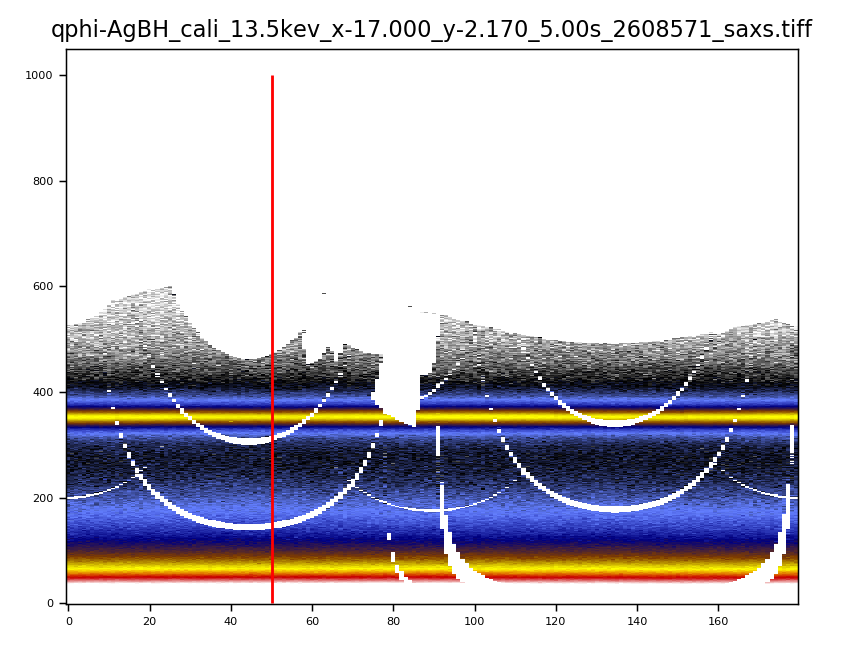

In [49]:
init_ang_cut = 50

fig, ax = plt.subplots()
show_img(  sqphi, ax=[fig,ax], logs=True, aspect= None, cmap=  cmap_hdr_goldish,#cmap_hdr_albula, 
           vmin= 1e0,vmax=1e3,   #show_colorbar=True,
           tick_size=6, colorbar_fontsize=6, lab_fontsize=12,
           show_ticks= True, title_size=8, 
           #extent=[phis[0], phis[-1], qs[0], qs[-1]], 
           #xlabel=r'$phi (deg)$', ylabel=  r'$q (\AA^{-1})$',
           image_name= 'qphi-' + fp )  
ax.vlines(   init_ang_cut, 0, len( qs ), colors='r'  )

* Find the q peak with max intensity

<IPython.core.display.Javascript object>


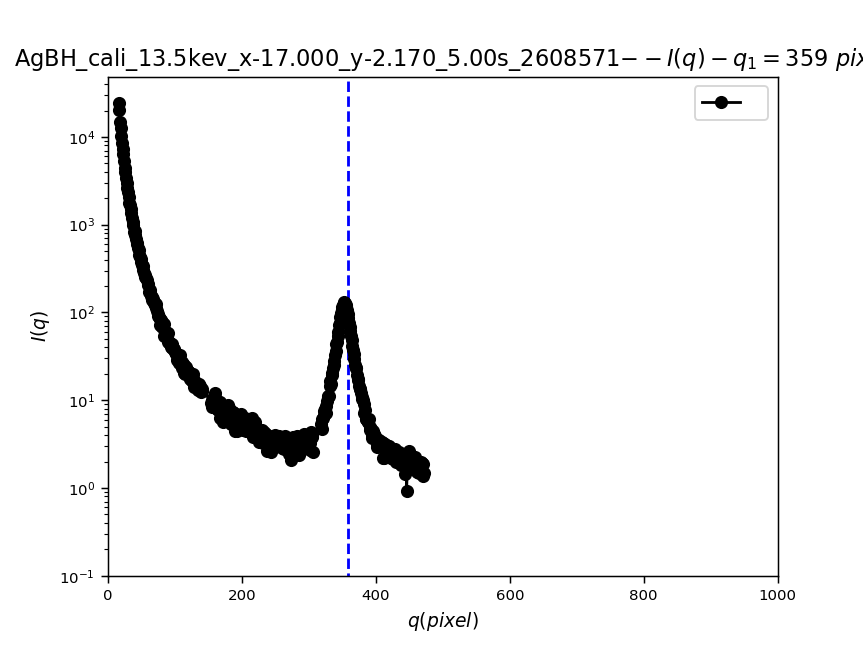

Text(0, 0.5, '$I(q)$')

In [51]:
y, qmask = get_nonNan( sqphi[:, init_ang_cut] )
x = np.arange( bin_num_q )[qmask]

qstart_cut= 200
q_cut_offest = 6
qmax = np.argmax( y[qstart_cut:] ) + q_cut_offest
qpeak = int( x[qstart_cut:][ qmax ] )
fig,ax=plt.subplots()
plot1D( x= x, y = y,  m='o', c='k', ax=ax, xlim=[0,bin_num_q  ], ylim=[ .1,  y.max()*2 ], logy=True)
ax.vlines( qpeak, 0, 1e6, linestyle='--' , color='b' )
ax.set_title (  fp[:-10] + r'$--I(q)- q_1=%.0f\ pix$'%qpeak ) 
ax.set_xlabel (r'$q (pixel)$')
ax.set_ylabel ( r'$I(q)$' )

* Plot the intensity in a range of qw width around the q-peak
    * qw: defines the half width in pixel

<IPython.core.display.Javascript object>


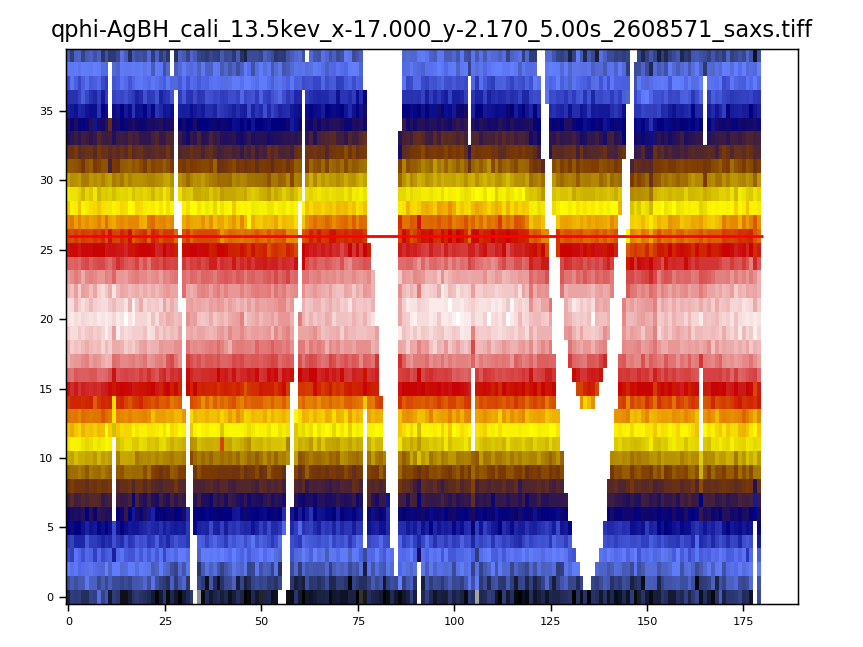

In [52]:
show_ang_cut_wid = 20 #50 
fig, ax = plt.subplots()
show_img(  sqphi[  qpeak - show_ang_cut_wid -q_cut_offest:  qpeak + show_ang_cut_wid-q_cut_offest], 
           ax=[fig,ax], logs=True, aspect= None, cmap=  cmap_hdr_goldish,#cmap_hdr_albula, 
           #vmin= 1e-1,vmax=1e5,  #show_colorbar=True,
           tick_size=6, colorbar_fontsize=6, lab_fontsize=12,
           show_ticks= True, title_size=8, 
           #extent=[phis[0], phis[-1], qs[0], qs[-1]], 
           #xlabel=r'$phi (deg)$', ylabel=  r'$q (\AA^{-1})$',
           image_name= 'qphi-' + fp )  
ax.hlines(   show_ang_cut_wid + q_cut_offest, 0, len( phis ), colors='r'  )

In [53]:
iang, imask = get_nonNan( sqphi[qpeak  ] ) 

<IPython.core.display.Javascript object>


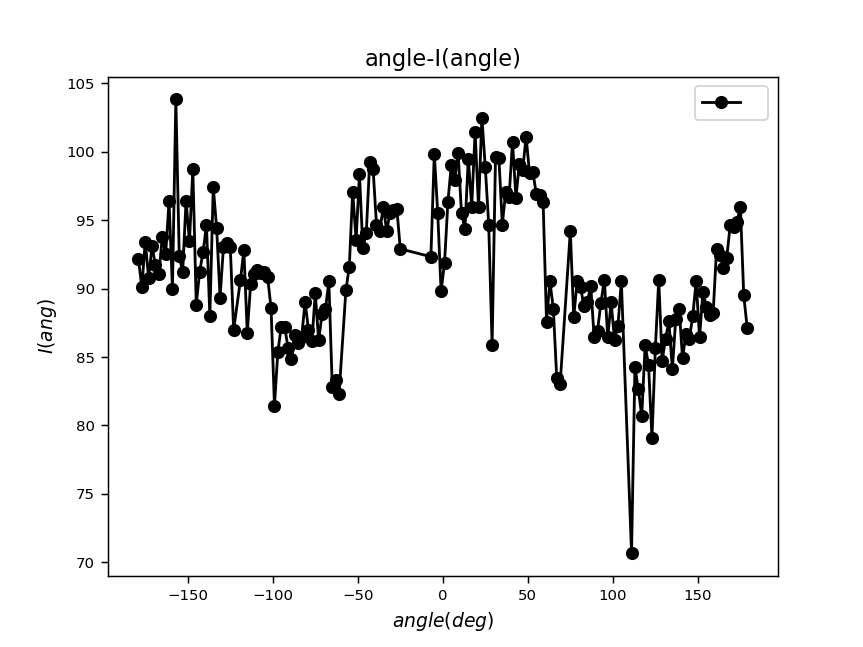

Text(0, 0.5, '$I(ang)$')

In [54]:
fig,ax=plt.subplots()
#plot1D(  iang[~iang_ma] , phis[~iang_ma], m='o', c='k', ax=ax, title='angle-I(angle)' )
plot1D( x = phis[imask],  y = iang, m='o', c='k', ax=ax, title='angle-I(angle)' )
ax.set_xlabel (r'$angle (deg)$')
ax.set_ylabel ( r'$I(ang)$' )  

## A code to automatically search the beam center

<IPython.core.display.Javascript object>


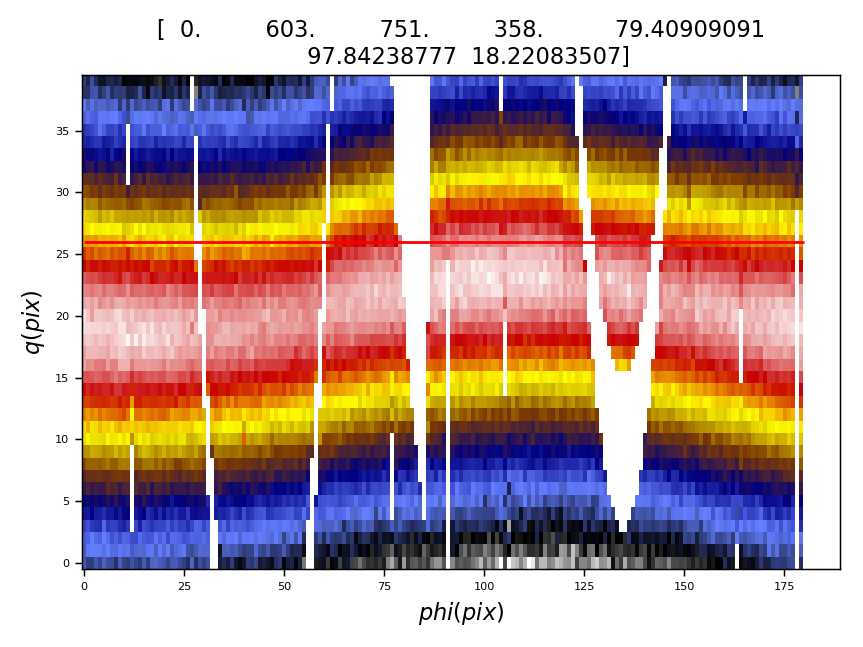

<IPython.core.display.Javascript object>


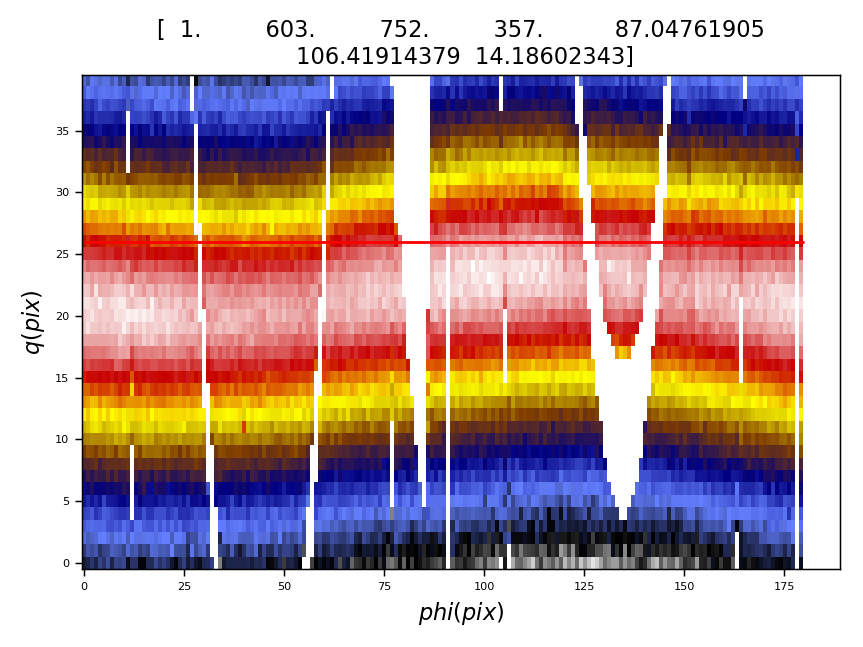

<IPython.core.display.Javascript object>


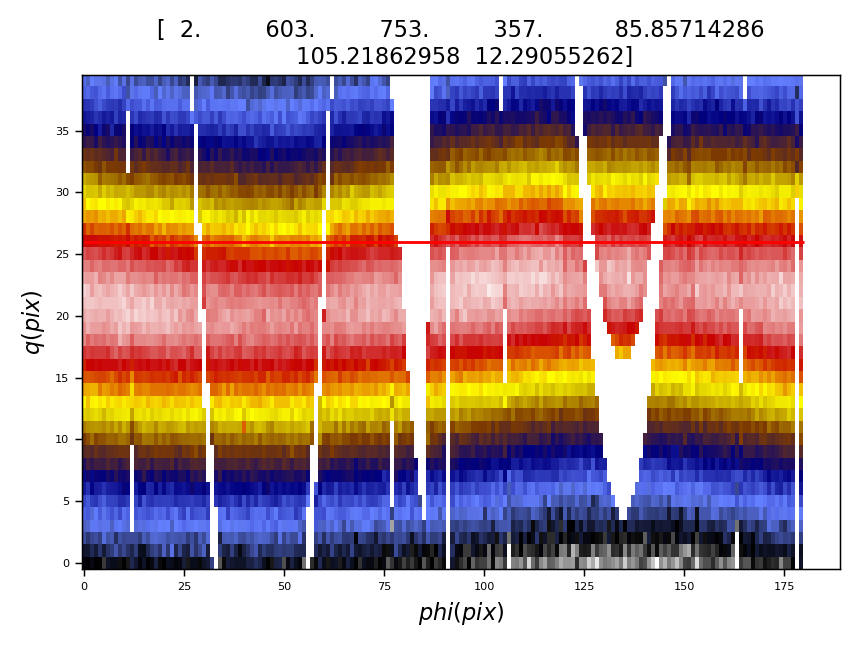

<IPython.core.display.Javascript object>


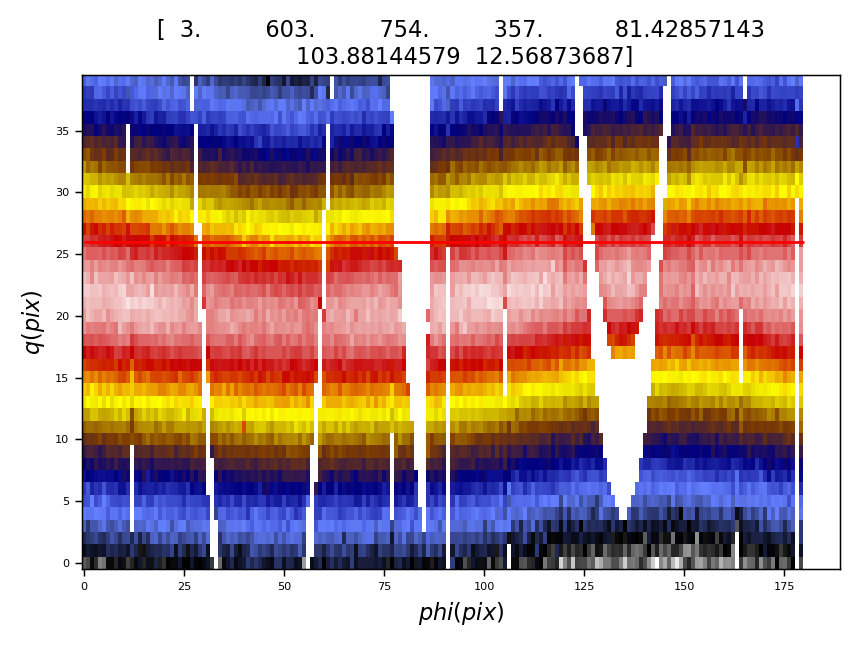

<IPython.core.display.Javascript object>


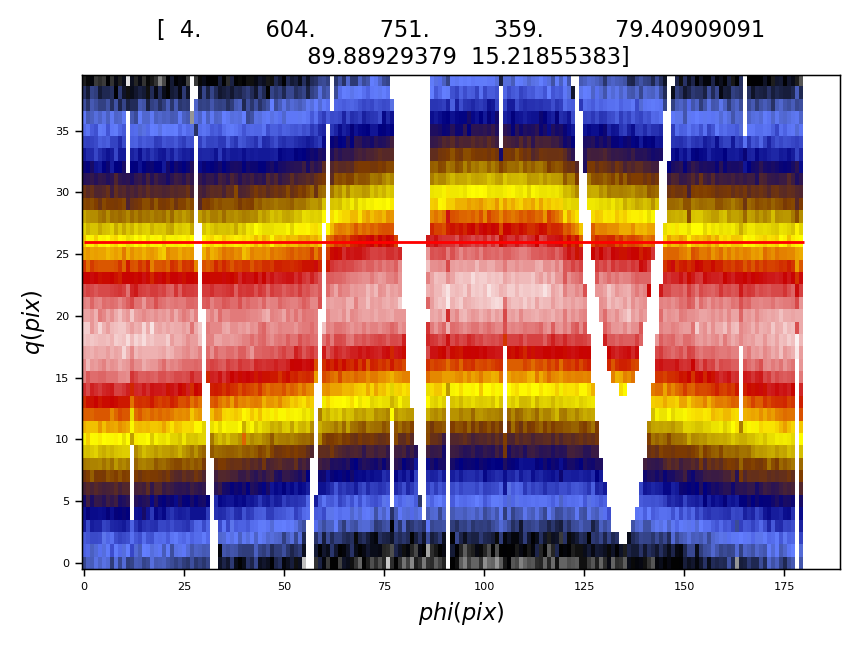

<IPython.core.display.Javascript object>


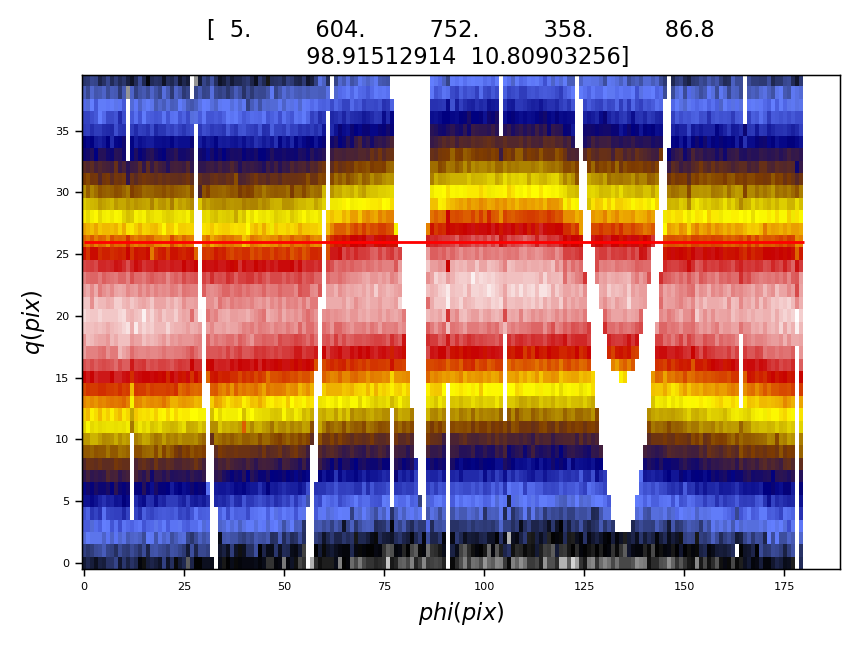

<IPython.core.display.Javascript object>


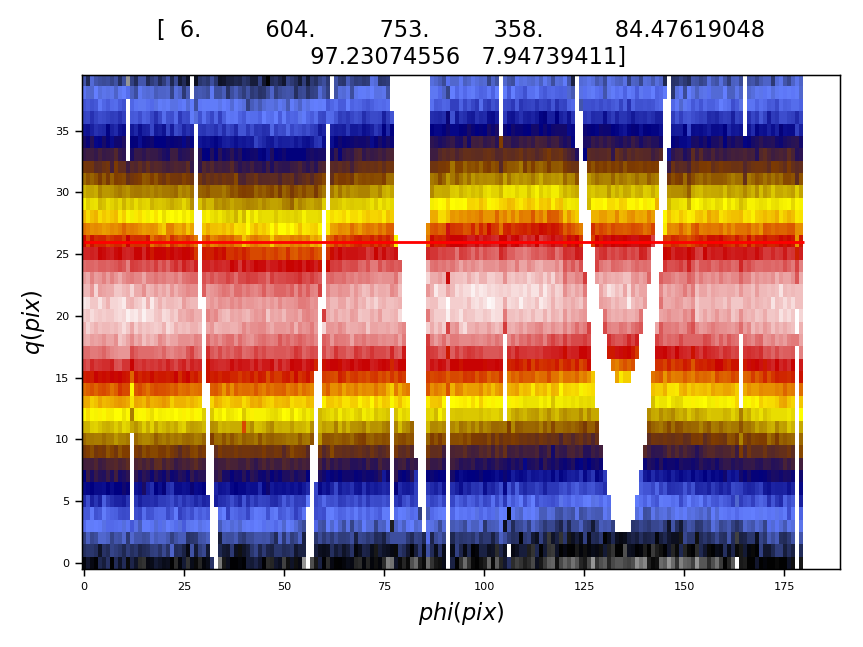

<IPython.core.display.Javascript object>


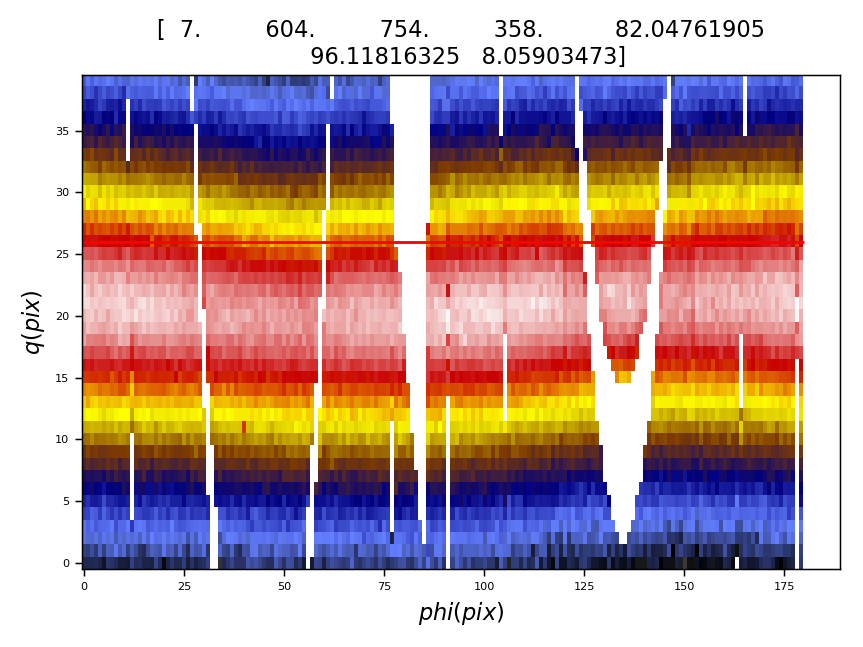

<IPython.core.display.Javascript object>


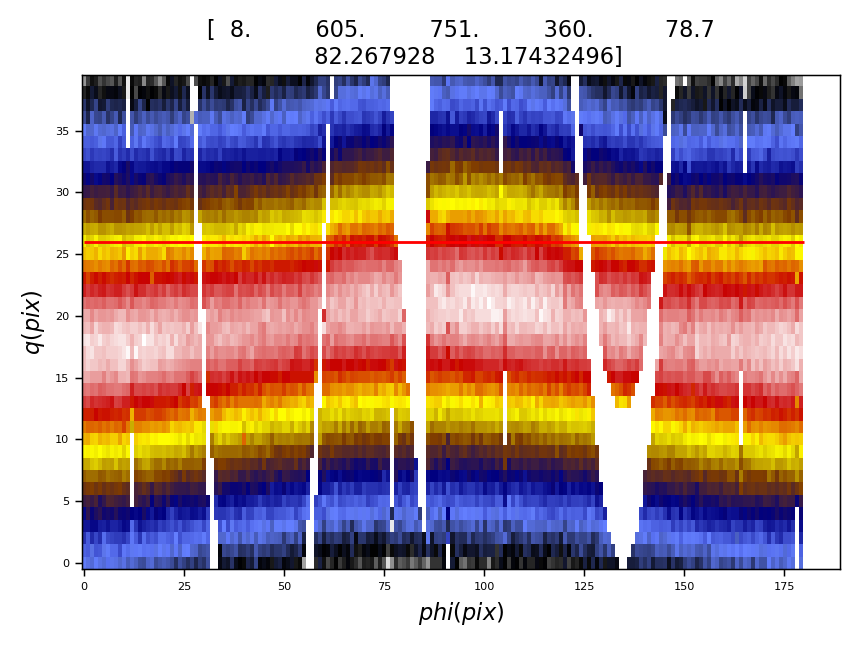

<IPython.core.display.Javascript object>


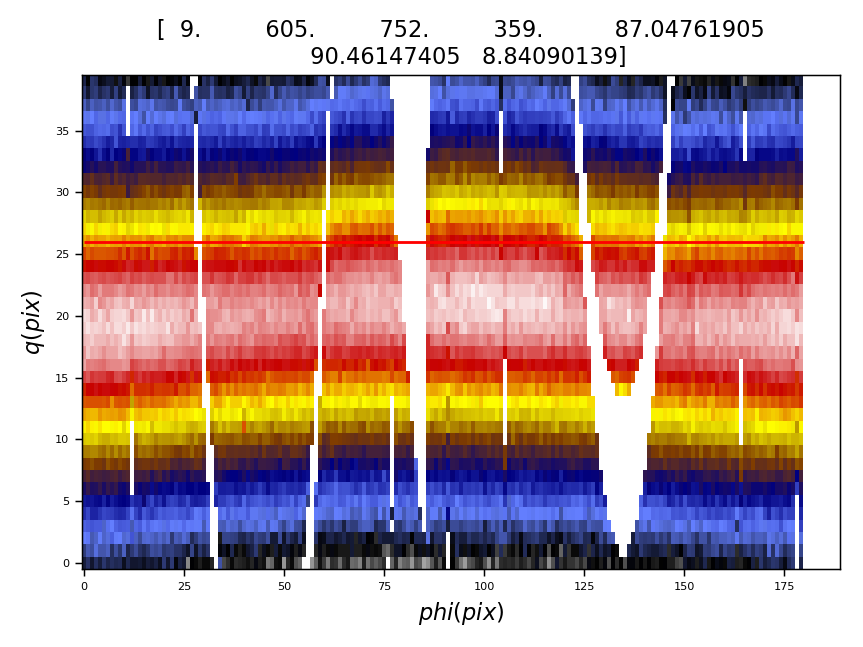

<IPython.core.display.Javascript object>


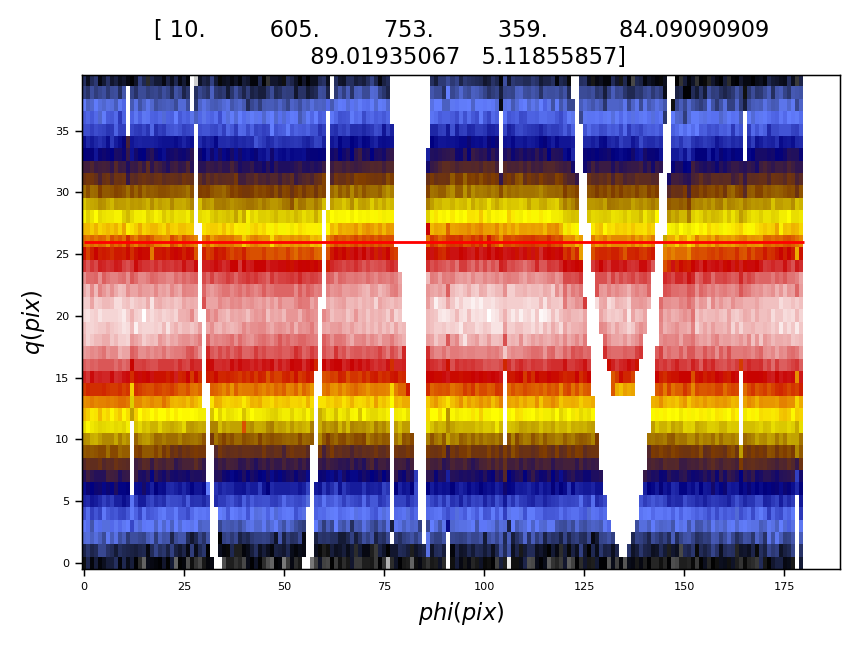

<IPython.core.display.Javascript object>


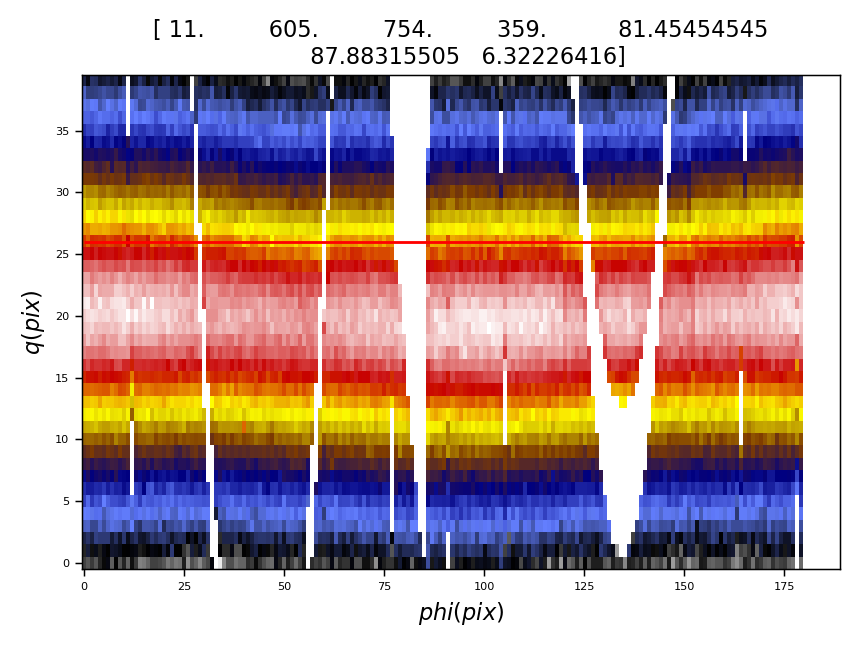

<IPython.core.display.Javascript object>


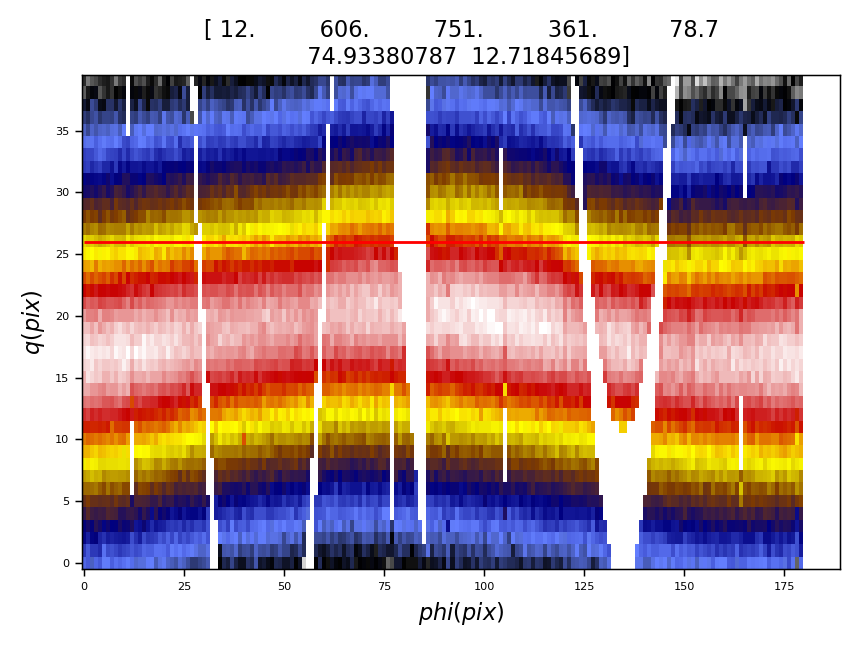

<IPython.core.display.Javascript object>


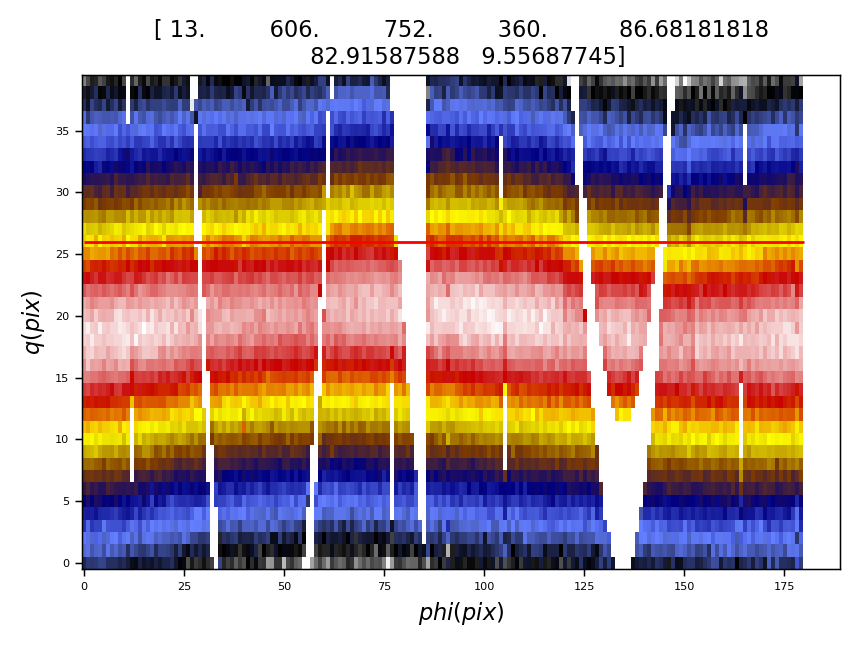

<IPython.core.display.Javascript object>


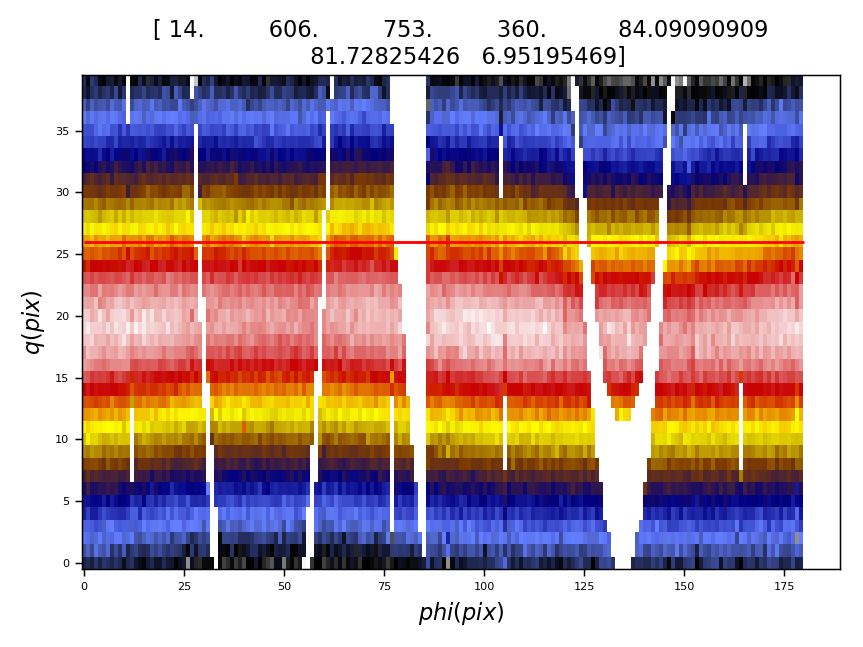

<IPython.core.display.Javascript object>


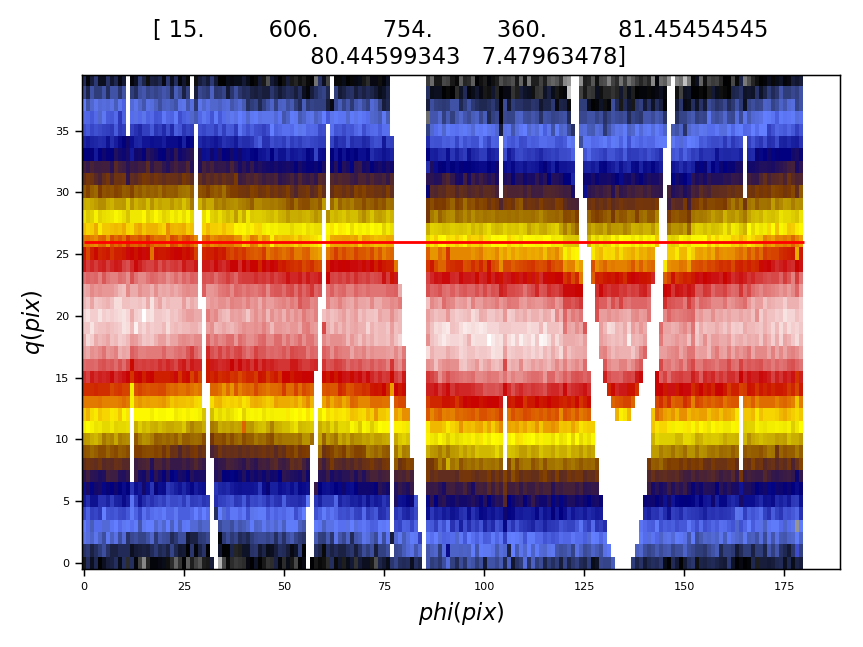

The found beam center (cx, cy) is: ( 605.0, 753.0 ) based on the intenstity deviation from a straight line.


In [56]:
res = auto_search_beam_center(  img, mask=mask, init_center= center, serach_width= 2, 
                                q_cut_offest= q_cut_offest,bin_num_q=bin_num_q,  bin_num_phi=bin_num_phi,
                                init_ang_cut = init_ang_cut, qstart_cut = qstart_cut, 
                                show_ang_cut_wid =show_ang_cut_wid, show_search=True)

<IPython.core.display.Javascript object>


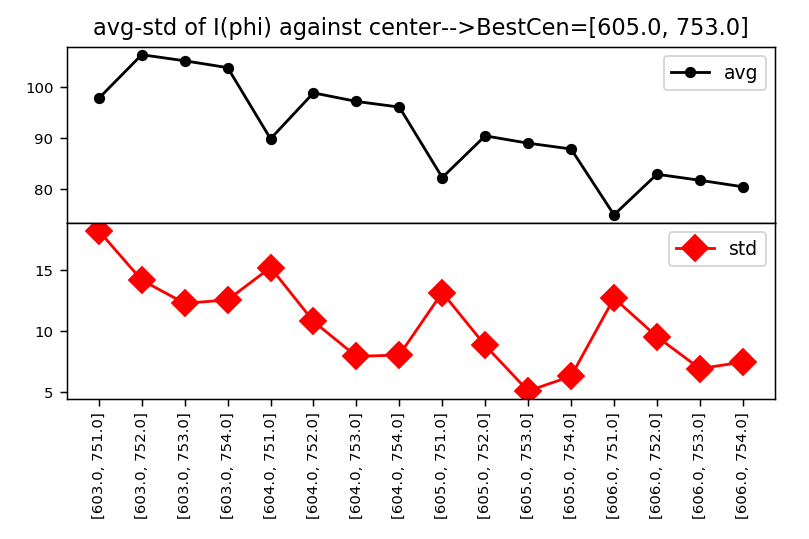

/home/yuzhang/conda_envs/pyScattering/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


In [57]:
plot_search_center_result( res )

* Use the new center

In [58]:
print( res[1]  )
setup_pargs['center']= np.int_( res[1] )

[605.0, 753.0]


## Do Circular Average

<IPython.core.display.Javascript object>


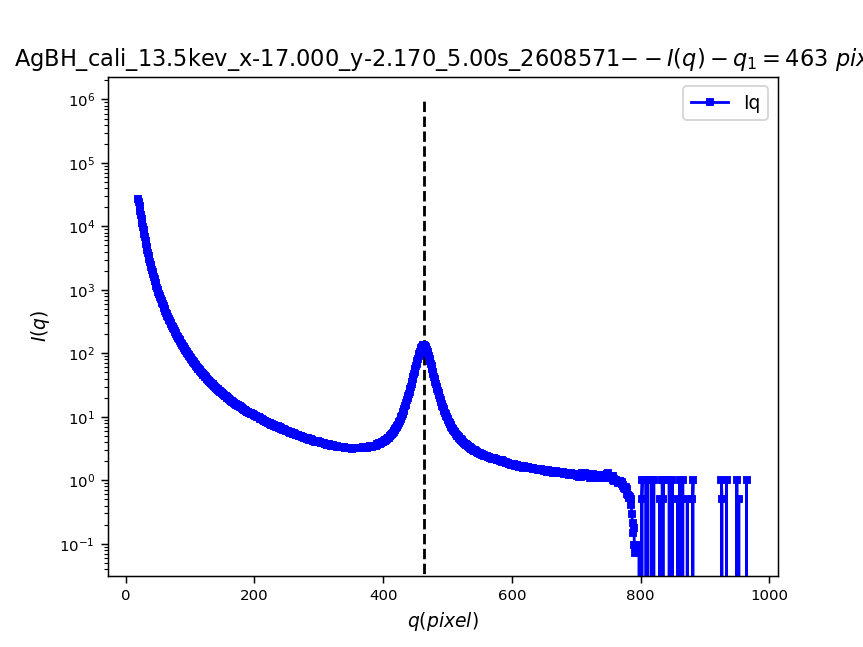

Text(0, 0.5, '$I(q)$')

In [59]:
setup_pargs['filename'] = inDir + fp
qp0, iq0, q0 = get_circular_average( img, mask , pargs=setup_pargs,save= True  )
qmax = np.argmax( iq0[qstart_cut:] )
qpeak = int( qp0[qstart_cut:][ qmax ] )
fig ,ax = plt.subplots(  )
plot1D( x = qp0, y = iq0, yerr= None, logy= True,  ax=ax, 
       c='b', m = 's', legend='Iq', markersize= 3) 
ax.vlines( qpeak, 0, 1e6, linestyle='--'  )
#ax.set_ylim(.1, 200)
ax.set_title (  fp[:-10] + r'$--I(q)- q_1=%.0f\ pix$'%qpeak )
 
ax.set_xlabel (r'$q (pixel)$')
ax.set_ylabel ( r'$I(q)$' )

<IPython.core.display.Javascript object>


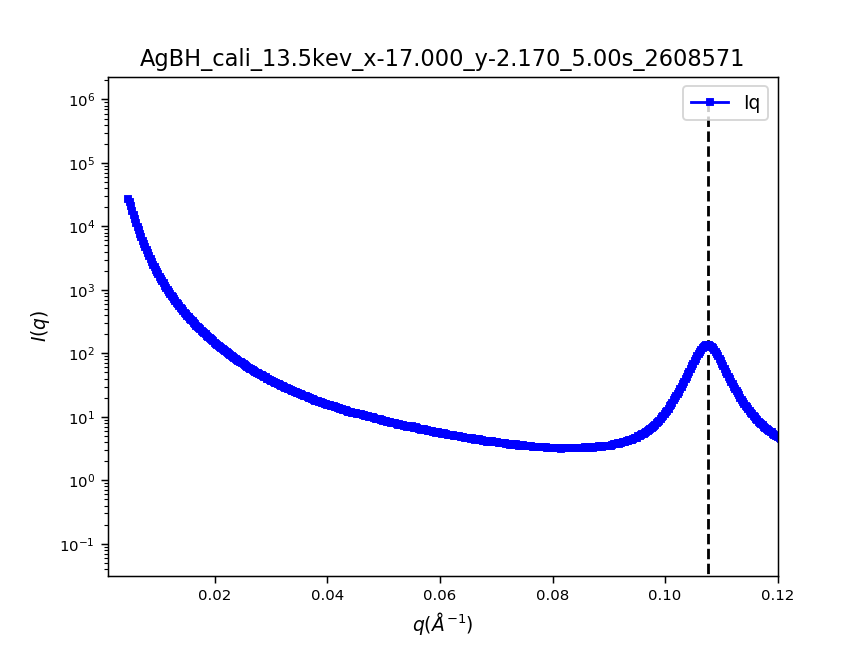

Text(0, 0.5, '$I(q)$')

In [60]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = iq0, yerr= None, logy= True, xlim=[0.001, 0.12],  ax=ax, 
       c='b', m = 's', legend='Iq', markersize= 3)   
ax.vlines( 0.1076, 0, 1e6, linestyle='--'  )
ax.set_xlim(.001, 0.12)
#ax.set_ylim(.1, 200)
#ax.set_title (  r'$I(q)- q_1=%.5f$'%qpeak +  r'$\AA^{-1}$')
ax.set_title (  fp[:-10])
ax.set_xlabel (r'$q (\AA^{-1})$')
ax.set_ylabel ( r'$I(q)$' )

In [62]:
md  = {}
md['md'] = setup_pargs
md['mask'] = mask
md['filename'] =   outDir + 'SAXS_setup_pargs_test.h5'

In [63]:
md

{'md': {'uid': 'sid=xx',
  'dpix': 0.17200000000000001,
  'Ldet': 5065.0,
  'lambda_': 0.9184,
  'exposuretime': 0.1,
  'timeperframe': 0.1,
  'center': array([605, 753]),
  'path': '/home/yuzhang/Test_SAXS/Results/',
  'filename': '/home/yuzhang/Test_SAXS/Data/AgBH_cali_13.5kev_x-17.000_y-2.170_5.00s_2608571_saxs.tiff'},
 'mask': array([[ True,  True,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'filename': '/home/yuzhang/Test_SAXS/Results/SAXS_setup_pargs_test.h5'}

In [64]:
dicttoh5(  md,  md['filename'], overwrite_data=True  )
#setup_pargs = h5todict( md['filename'] )['md']

## For WAXS

<IPython.core.display.Javascript object>


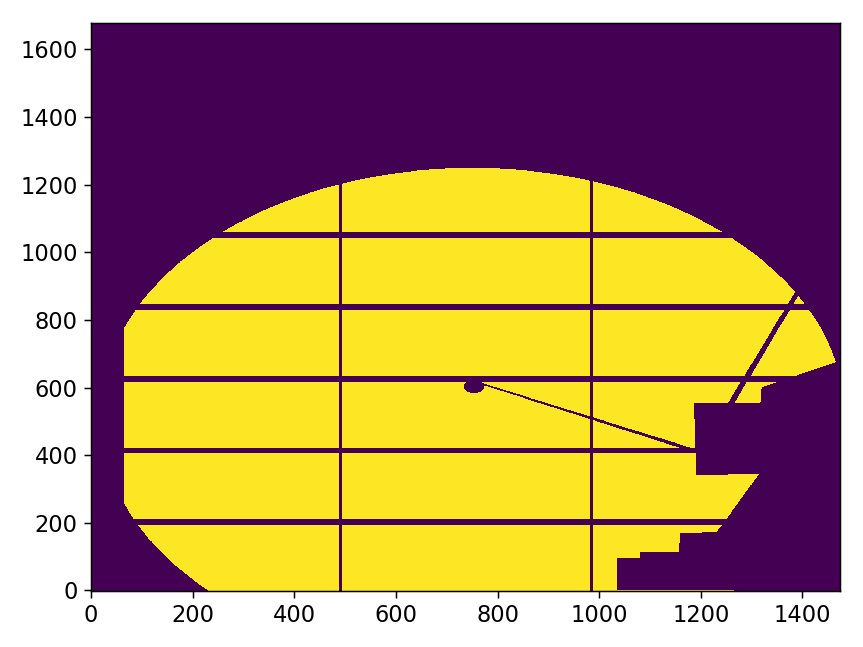

In [65]:
fpw  = 'Pilatus800_custom-mask.png'
maskw = np.array( get_cms_img( fpw, inDir )[:,:,1], dtype=bool)
show_img(mask, show_colorbar=False)

In [68]:
fpw  =  'AgBH_cali_13.5kev_x-17.000_y-2.170_5.00s_2608571_waxs.tiff'

In [69]:
img_ = get_cms_img( fpw, inDir ) 
imgw = img_ * maskw
imgw.shape

(1043, 981)

<IPython.core.display.Javascript object>


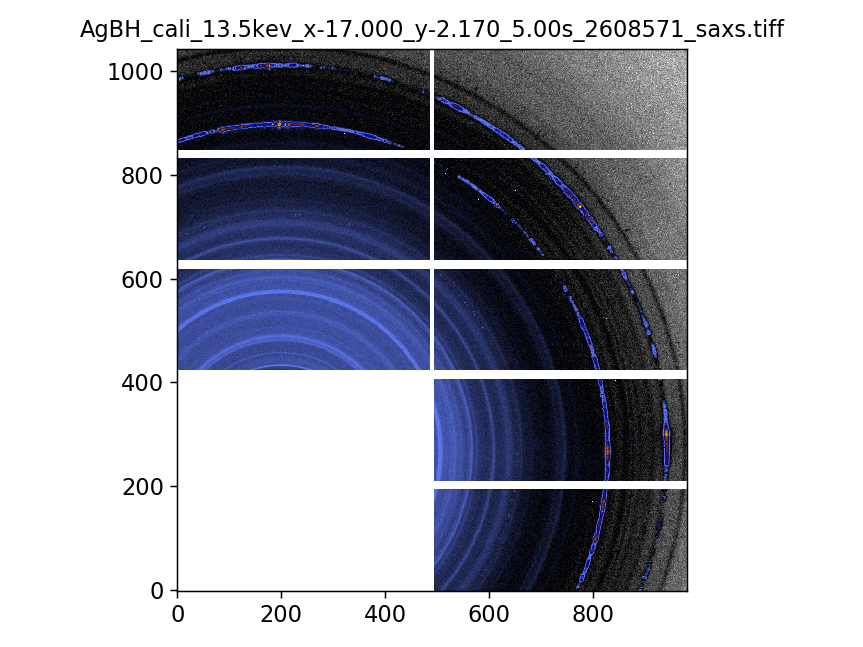

In [70]:
show_img( imgw, logs=True, aspect= 1, cmap=  cmap_hdr_goldish,  image_name= fp, save=True,path=outDir)

## Beamline parameters for WAXS

In [86]:
center =[    268, 199   ]   #  [ mask.shape[0] - 199 , 268  ]  
inc_x0 =  center[1]
inc_y0=   center[0]
cx,cy=center
cw=300
#Ldet = 5.08 *1000  #5.038 *1000 
Ldet = 0.257 *1000 
lambda_ = 0.9184
dpix = 172 *10**(-3)
exposuretime = 0.1
timeperframe = 0.1
uid = 'sid=xx'
setup_pargsw=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, exposuretime=exposuretime,
        timeperframe=timeperframe, center=center, path= outDir )
print_dict( setup_pargsw )

uid--> sid=xx
dpix--> 0.17200000000000001
Ldet--> 257.0
lambda_--> 0.9184
exposuretime--> 0.1
timeperframe--> 0.1
center--> [268, 199]
path--> /home/yuzhang/Test_SAXS/Results/


In [83]:
ringw = create_ring_mask( maskw.shape, r1= 740, r2= 750 , center=center[::-1])

<IPython.core.display.Javascript object>


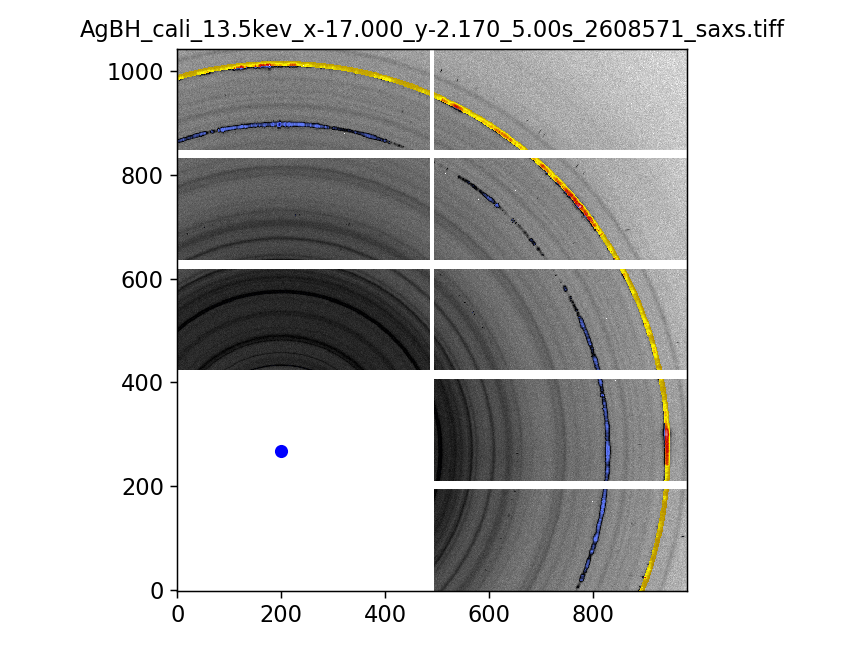

In [84]:
show_img( imgw * (1+ ringw*1e5), logs=True, aspect= 1, cmap=  cmap_hdr_goldish,
          image_name= fp, save=True,path=outDir, center=center[::-1])

<IPython.core.display.Javascript object>


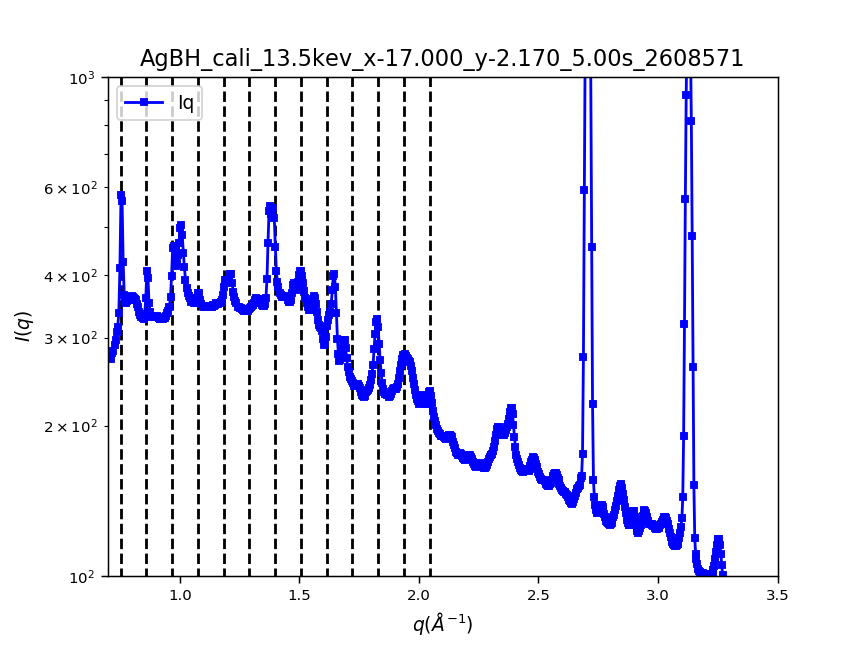

Text(0, 0.5, '$I(q)$')

In [89]:
fig,ax=plt.subplots()
setup_pargsw['filename'] = inDir + fpw[:-10]
qp0, iq0, q0 = get_circular_average( imgw, maskw , pargs=setup_pargsw,save= True  )
plot1D( x = q0, y = iq0, yerr= None, logy= True,   ax=ax, 
       c='b', m = 's', legend='Iq', markersize= 3) 
ax.vlines( 0.1076 * np.arange(7, 20), 0, 1e4, linestyle='--'  )
ax.set_xlim(.7, 3.5)
ax.set_ylim(100, 1000)
ax.set_title (  fp[:-10])
ax.set_xlabel (r'$q (\AA^{-1})$')
ax.set_ylabel ( r'$I(q)$' )

In [90]:
md  = {}
md['md'] = setup_pargsw
md['mask'] = maskw
export_dict_to_h5(  md, fout= outDir + 'WAXS_setup_pargs_test.h5', overwrite=True  )
#setup_pargs = load_h5_as_dict( outDir + 'WAXS_setup_pargs_test.h5' )['md']
#print(setup_pargs)

The file: /home/yuzhang/Test_SAXS/Results/WAXS_setup_pargs_test.h5 is deleted.
uid
dpix
Ldet
lambda_
exposuretime
timeperframe
center
path
filename


# The End